In [132]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [133]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv') # Убедиться в правильности пути к файлу!
dataset.head(10) # Вывод первых 10 строк

,Unnamed: 0,region,population,area,infant_mortality,gdp,literacy,arable,birthrate,deathrate
0,0,0.0,0.883442,0.949292,0.964046,0.023739,0.000000,0.431729,0.933051,0.912921
1,1,0.0,0.656108,0.716262,0.506345,0.259141,0.817639,0.575092,0.268436,0.235017
2,2,0.0,0.889605,1.000000,0.588837,0.319275,0.574146,0.213580,0.325619,0.193086
3,3,0.0,0.221784,0.344182,0.316005,0.388712,0.960595,0.390313,0.461096,0.089881
4,4,0.0,0.243741,0.408165,0.128859,0.669156,1.000000,0.174240,0.056816,0.300597
5,5,0.0,0.784469,0.998309,1.000000,0.123009,0.082472,0.182309,0.908174,1.000000
6,6,0.0,0.068555,0.294178,0.501139,0.407796,0.933985,0.447587,0.240657,0.242972
7,7,0.0,0.240601,0.404058,0.483604,0.478170,0.852430,0.532637,0.319866,0.244947
8,8,0.0,0.909869,1.000000,0.427469,0.483670,0.961918,0.435055,0.314354,0.376064
9,9,0.0,0.636624,0.718951,0.524111,0.213241,0.981686,0.523007,0.175057,0.412947


In [134]:
Xx = dataset.iloc[:, [1,*range(3,10)]]
Xx.head(10)

,region,area,infant_mortality,gdp,literacy,arable,birthrate,deathrate
0,0.0,0.949292,0.964046,0.023739,0.000000,0.431729,0.933051,0.912921
1,0.0,0.716262,0.506345,0.259141,0.817639,0.575092,0.268436,0.235017
2,0.0,1.000000,0.588837,0.319275,0.574146,0.213580,0.325619,0.193086
3,0.0,0.344182,0.316005,0.388712,0.960595,0.390313,0.461096,0.089881
4,0.0,0.408165,0.128859,0.669156,1.000000,0.174240,0.056816,0.300597
5,0.0,0.998309,1.000000,0.123009,0.082472,0.182309,0.908174,1.000000
6,0.0,0.294178,0.501139,0.407796,0.933985,0.447587,0.240657,0.242972
7,0.0,0.404058,0.483604,0.478170,0.852430,0.532637,0.319866,0.244947
8,0.0,1.000000,0.427469,0.483670,0.961918,0.435055,0.314354,0.376064
9,0.0,0.718951,0.524111,0.213241,0.981686,0.523007,0.175057,0.412947


In [135]:
X = dataset.iloc[:, [1,*range(3,10)]].values
Y = dataset['population'].values

In [136]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [137]:

input_layer_size = 8

# Количество нейронов в каждом скрытом слое и количество таких слоёв могут быть выбраны произвольно.
# Увеличение числа нейронов относительно предыдущего слоя позволяет лучше обрабатывать отдельные примеры.
# Уменьшение числа нейронов относительно предыдущего слоя позволяет обощать информацию и выводить новые правила.
# Увеличение числа слоёв помогает сети работать как более сложная функция.
first_hidden_layer_size = 50
second_hidden_layer_size = 30

# Количество нейронов в выходном слое должно быть равно количеству выходных параметров.
output_layer_size = 1

# Параметры обучения нейронной сети: количество эпох и размер батча.
epochs_number = 200
batch_size = 48

In [138]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

# Второй скрытый слой, функция активации - ReLU
model.add(Dense(second_hidden_layer_size, activation='relu'))

# Выходной слой, функция активации - линейная, т.к. решается задача регрессии.
model.add(Dense(output_layer_size, activation='linear'))

In [139]:
# Обзор нейронной сети, теперь в ней есть слои и нейроны.
# Если внимательно посмотреть на количество параметров, т.е. связей между нейронами, то можно увидеть, что автоматически добавлены нейроны смещения.
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                450       
_________________________________________________________________
dense_26 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 31        
Total params: 2,011
Trainable params: 2,011
Non-trainable params: 0
_________________________________________________________________


In [140]:
# Настройка нейронной сети.
# Функция потерь (loss) - среднеквадратическая ошибка.
# Оптимизатор (optimizer) - adam (в настоящий момент - это стандартный оптимизатор).
# Указываем метрики средняя абсолютная ошибка (mean_absolute_error) и среднеквадратическая ошиба (mean_squared_error) для дальнейшего анализа.
model.compile(loss='mean_squared_error', optimizer='Adadelta', metrics=['mean_absolute_error', 'mean_squared_error'])

In [141]:
# Обучение нейронной сети.
# На вход передаем обучающие и тестовые выборки, количество эпох и размер батча.
# На выходе получаем объект с историей обучения, который далее будем анализировать.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 181 samples, validate on 46 samples
Epoch 1/200
181/181 [==============================] - 0s 1ms/step - loss: 0.2017 - mean_absolute_error: 0.3883 - mean_squared_error: 0.2017 - val_loss: 0.1348 - val_mean_absolute_error: 0.3136 - val_mean_squared_error: 0.1348
Epoch 2/200
181/181 [==============================] - 0s 60us/step - loss: 0.0856 - mean_absolute_error: 0.2482 - mean_squared_error: 0.0856 - val_loss: 0.0776 - val_mean_absolute_error: 0.2313 - val_mean_squared_error: 0.0776
Epoch 3/200
181/181 [==============================] - 0s 195us/step - loss: 0.0634 - mean_absolute_error: 0.2071 - mean_squared_error: 0.0634 - val_loss: 0.0633 - val_mean_absolute_error: 0.2097 - val_mean_squared_error: 0.0633
Epoch 4/200
181/181 [==============================] - 0s 72us/step - loss: 0.0557 - mean_absolute_error: 0.1932 - mean_squared_error: 0.0557 - val_loss: 0.0541 - val_mean_absolute_error: 0.1944 - val_mean_squared_error: 0.0541
Epoch 5/200
181/181 [======================

181/181 [==============================] - 0s 69us/step - loss: 0.0206 - mean_absolute_error: 0.1139 - mean_squared_error: 0.0206 - val_loss: 0.0121 - val_mean_absolute_error: 0.0820 - val_mean_squared_error: 0.0121
Epoch 37/200
181/181 [==============================] - 0s 57us/step - loss: 0.0149 - mean_absolute_error: 0.0878 - mean_squared_error: 0.0149 - val_loss: 0.0118 - val_mean_absolute_error: 0.0792 - val_mean_squared_error: 0.0118
Epoch 38/200
181/181 [==============================] - 0s 59us/step - loss: 0.0122 - mean_absolute_error: 0.0760 - mean_squared_error: 0.0122 - val_loss: 0.0116 - val_mean_absolute_error: 0.0786 - val_mean_squared_error: 0.0116
Epoch 39/200
181/181 [==============================] - 0s 60us/step - loss: 0.0122 - mean_absolute_error: 0.0769 - mean_squared_error: 0.0122 - val_loss: 0.0125 - val_mean_absolute_error: 0.0848 - val_mean_squared_error: 0.0125
Epoch 40/200
181/181 [==============================] - 0s 233us/step - loss: 0.0122 - mean_absol

181/181 [==============================] - 0s 287us/step - loss: 0.0165 - mean_absolute_error: 0.0987 - mean_squared_error: 0.0165 - val_loss: 0.0155 - val_mean_absolute_error: 0.1019 - val_mean_squared_error: 0.0155
Epoch 72/200
181/181 [==============================] - 0s 54us/step - loss: 0.0108 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0108 - val_loss: 0.0104 - val_mean_absolute_error: 0.0766 - val_mean_squared_error: 0.0104
Epoch 73/200
181/181 [==============================] - 0s 49us/step - loss: 0.0111 - mean_absolute_error: 0.0748 - mean_squared_error: 0.0111 - val_loss: 0.0108 - val_mean_absolute_error: 0.0811 - val_mean_squared_error: 0.0108
Epoch 74/200
181/181 [==============================] - 0s 55us/step - loss: 0.0113 - mean_absolute_error: 0.0750 - mean_squared_error: 0.0113 - val_loss: 0.0168 - val_mean_absolute_error: 0.1069 - val_mean_squared_error: 0.0168
Epoch 75/200
181/181 [==============================] - 0s 48us/step - loss: 0.0148 - mean_absol

Epoch 107/200
181/181 [==============================] - 0s 67us/step - loss: 0.0109 - mean_absolute_error: 0.0743 - mean_squared_error: 0.0109 - val_loss: 0.0115 - val_mean_absolute_error: 0.0873 - val_mean_squared_error: 0.0115
Epoch 108/200
181/181 [==============================] - 0s 49us/step - loss: 0.0107 - mean_absolute_error: 0.0738 - mean_squared_error: 0.0107 - val_loss: 0.0158 - val_mean_absolute_error: 0.1039 - val_mean_squared_error: 0.0158
Epoch 109/200
181/181 [==============================] - 0s 51us/step - loss: 0.0140 - mean_absolute_error: 0.0880 - mean_squared_error: 0.0140 - val_loss: 0.0227 - val_mean_absolute_error: 0.1269 - val_mean_squared_error: 0.0227
Epoch 110/200
181/181 [==============================] - 0s 61us/step - loss: 0.0157 - mean_absolute_error: 0.0973 - mean_squared_error: 0.0157 - val_loss: 0.0121 - val_mean_absolute_error: 0.0898 - val_mean_squared_error: 0.0121
Epoch 111/200
181/181 [==============================] - 0s 285us/step - loss: 0

181/181 [==============================] - 0s 53us/step - loss: 0.0093 - mean_absolute_error: 0.0657 - mean_squared_error: 0.0093 - val_loss: 0.0099 - val_mean_absolute_error: 0.0749 - val_mean_squared_error: 0.0099
Epoch 143/200
181/181 [==============================] - 0s 53us/step - loss: 0.0093 - mean_absolute_error: 0.0666 - mean_squared_error: 0.0093 - val_loss: 0.0100 - val_mean_absolute_error: 0.0781 - val_mean_squared_error: 0.0100
Epoch 144/200
181/181 [==============================] - 0s 288us/step - loss: 0.0092 - mean_absolute_error: 0.0656 - mean_squared_error: 0.0092 - val_loss: 0.0098 - val_mean_absolute_error: 0.0736 - val_mean_squared_error: 0.0098
Epoch 145/200
181/181 [==============================] - 0s 57us/step - loss: 0.0123 - mean_absolute_error: 0.0803 - mean_squared_error: 0.0123 - val_loss: 0.0127 - val_mean_absolute_error: 0.0859 - val_mean_squared_error: 0.0127
Epoch 146/200
181/181 [==============================] - 0s 51us/step - loss: 0.0113 - mean_a

Epoch 178/200
181/181 [==============================] - 0s 71us/step - loss: 0.0100 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0100 - val_loss: 0.0109 - val_mean_absolute_error: 0.0776 - val_mean_squared_error: 0.0109
Epoch 179/200
181/181 [==============================] - 0s 68us/step - loss: 0.0097 - mean_absolute_error: 0.0703 - mean_squared_error: 0.0097 - val_loss: 0.0111 - val_mean_absolute_error: 0.0846 - val_mean_squared_error: 0.0111
Epoch 180/200
181/181 [==============================] - 0s 61us/step - loss: 0.0088 - mean_absolute_error: 0.0655 - mean_squared_error: 0.0088 - val_loss: 0.0115 - val_mean_absolute_error: 0.0875 - val_mean_squared_error: 0.0115
Epoch 181/200
181/181 [==============================] - 0s 58us/step - loss: 0.0092 - mean_absolute_error: 0.0679 - mean_squared_error: 0.0092 - val_loss: 0.0104 - val_mean_absolute_error: 0.0749 - val_mean_squared_error: 0.0104
Epoch 182/200
181/181 [==============================] - 0s 262us/step - loss: 0

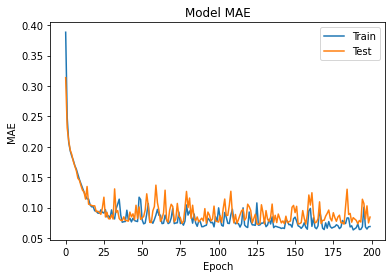

In [142]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

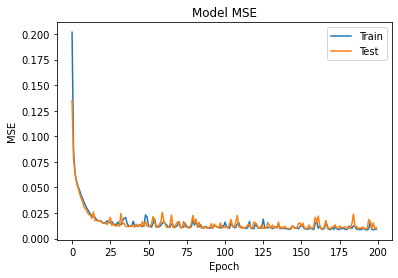

In [143]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
# Видно, что в процессе обучения сеть с каждой эпохой вычисляет всё более точные прогнозы значений Y.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [144]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

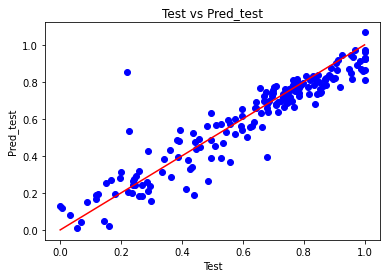

In [145]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
# В идеальной ситуации они должны совпадать, т.е. точки (Y_train[i], Y_pred_train[i]) должны лежать на прямой Y_train = Y_pred_train.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

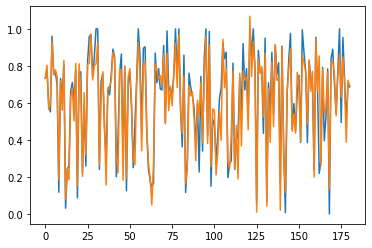

In [146]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [147]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

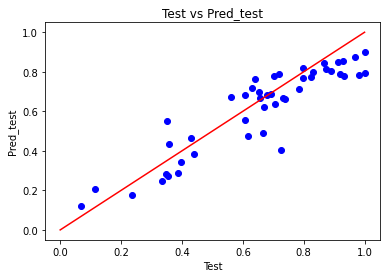

In [148]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

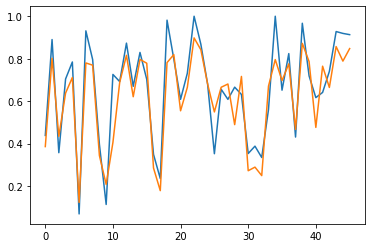

In [149]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [150]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.0931715726149185
0.10341687455774581


In [151]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)

k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.8684114217758179, p = 1.835455572252176e-11
Test k = 0.9729980826377869, p = 0.35633841156959534


In [152]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9012623429298401, p_s = 4.4487389466718597e-11
k_n = 102.1472671321167, p_n = 6.591781018699414e-23


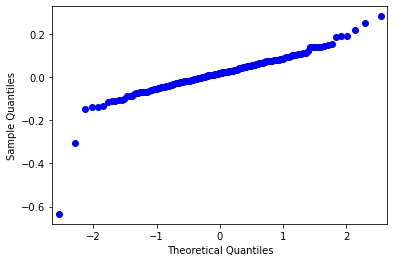

In [153]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

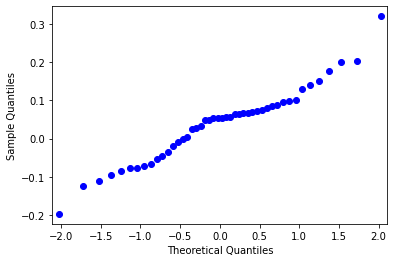

In [154]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

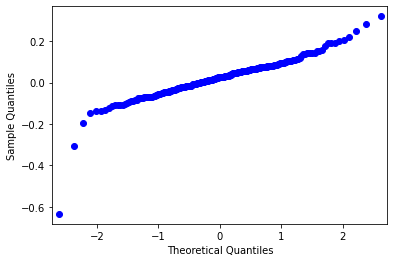

In [155]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

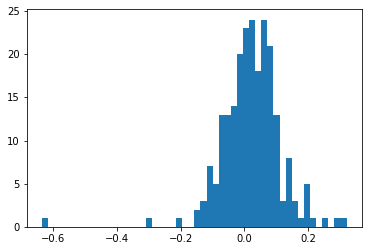

In [156]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [157]:
# Сохраним обученную нейронную сеть, название файла можно выбрать любое, расширение - h5.
model.save('SNN3.h5')